In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import zscore

In [2]:
data = pd.read_excel("Copper_Set.xlsx")

In [3]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
data.shape

(181673, 14)

In [5]:
data.drop(columns=["id","item_date","material_ref","delivery date"],axis=1,inplace=True)
data["quantity tons"].replace("e",np.nan,inplace=True)
data['quantity tons'].fillna(data['quantity tons'].median(),inplace=True)
data["customer"] = data["customer"].fillna(data["customer"].median())
data["country"] = data["country"].fillna(data["country"].median())
data["status"] = data["status"].fillna("Won")
data["application"] = data["application"].fillna(data["application"].median())
data["thickness"] = data["thickness"].fillna(data["thickness"].median())
data["selling_price"] = data["selling_price"].fillna(data["selling_price"].median())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181673 non-null  float64
 1   customer       181673 non-null  float64
 2   country        181673 non-null  float64
 3   status         181673 non-null  object 
 4   item type      181673 non-null  object 
 5   application    181673 non-null  float64
 6   thickness      181673 non-null  float64
 7   width          181673 non-null  float64
 8   product_ref    181673 non-null  int64  
 9   selling_price  181673 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.9+ MB


In [7]:
data.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05
mean,5.874894e+03,3.051221e+07,44.890727,25.614406,2.564822,1295.286724,4.739679e+08,1.918029e+03
std,2.349075e+06,2.433375e+07,24.403034,17.753421,6.572303,261.631754,7.175101e+08,3.317947e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097037e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716038e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


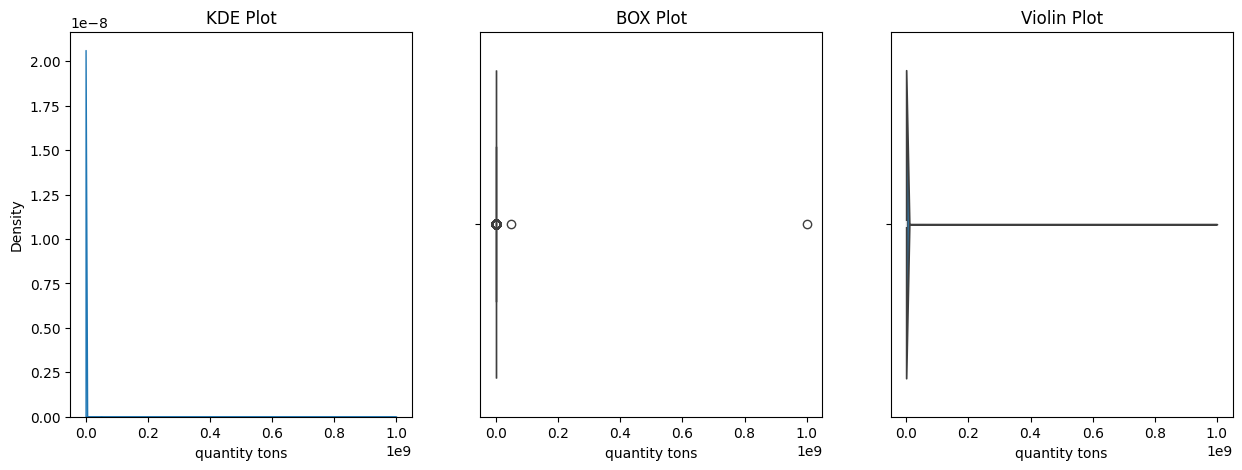

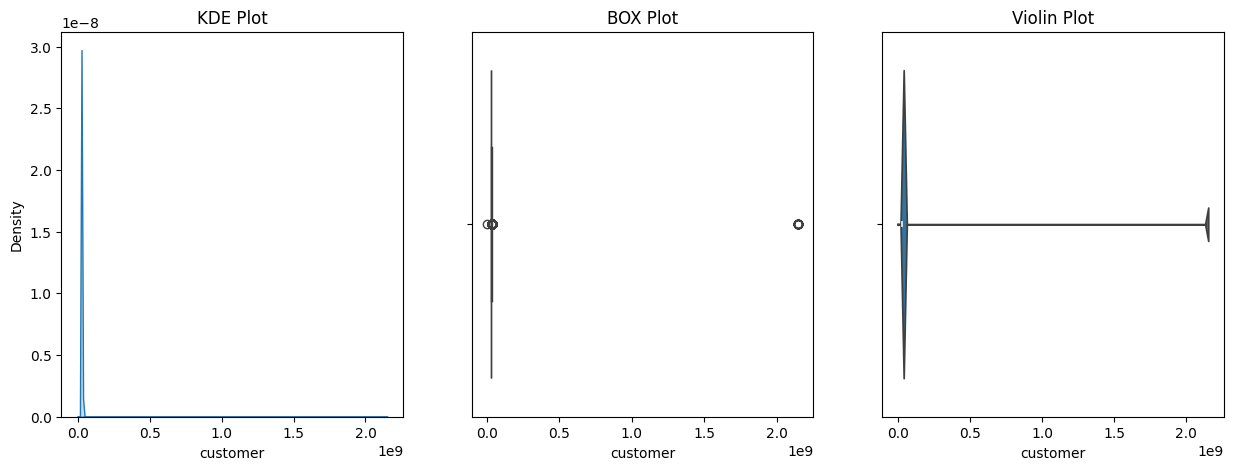

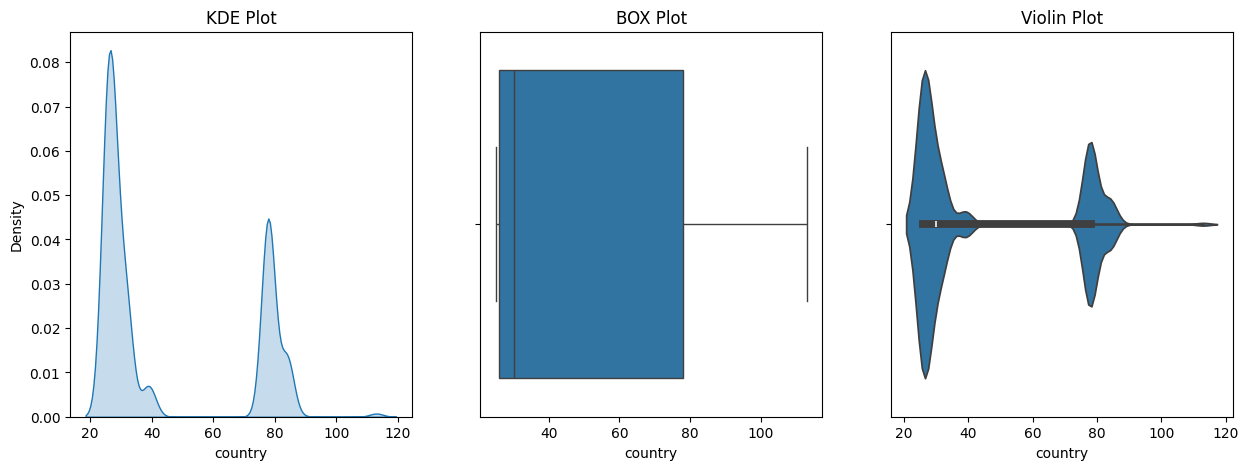

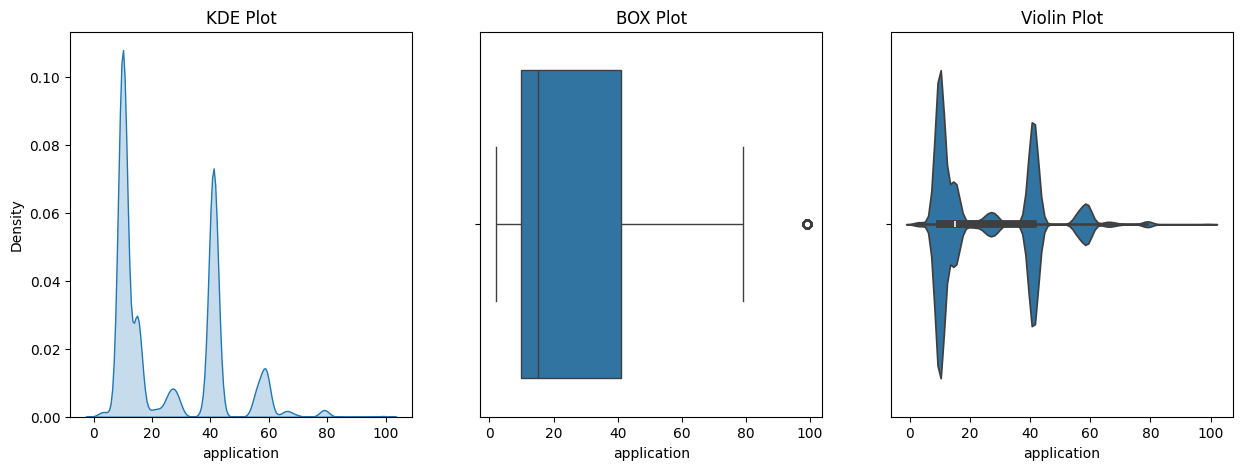

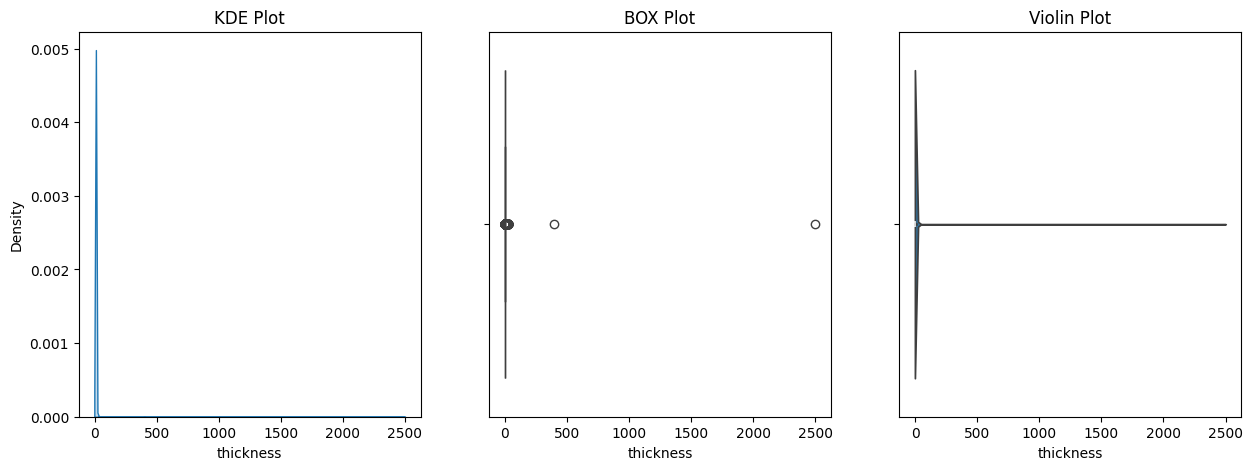

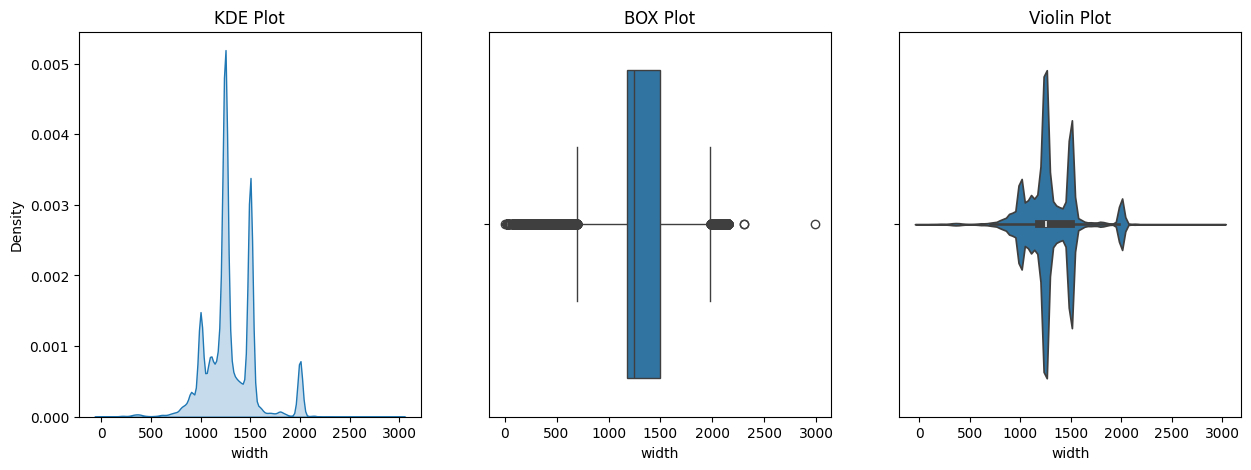

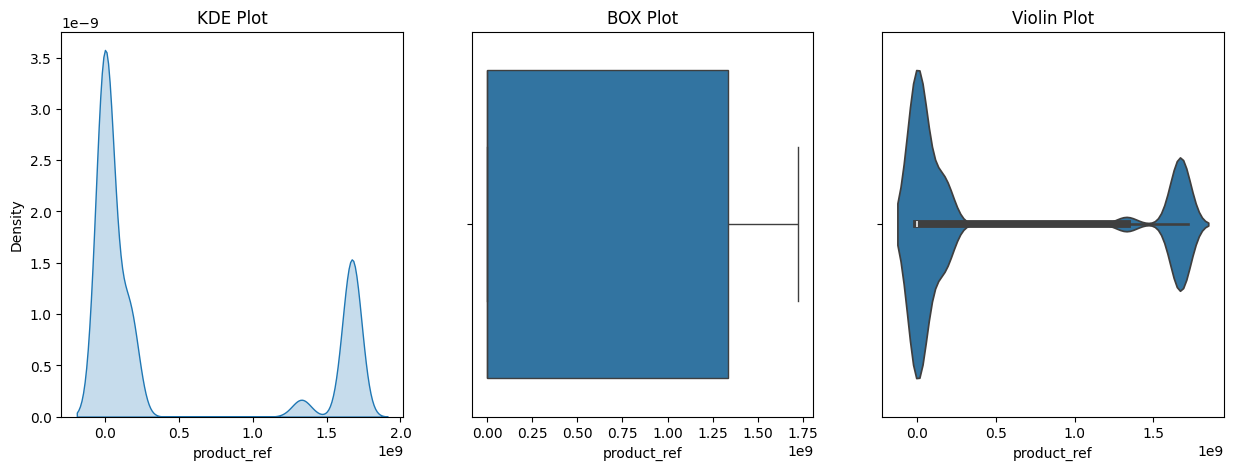

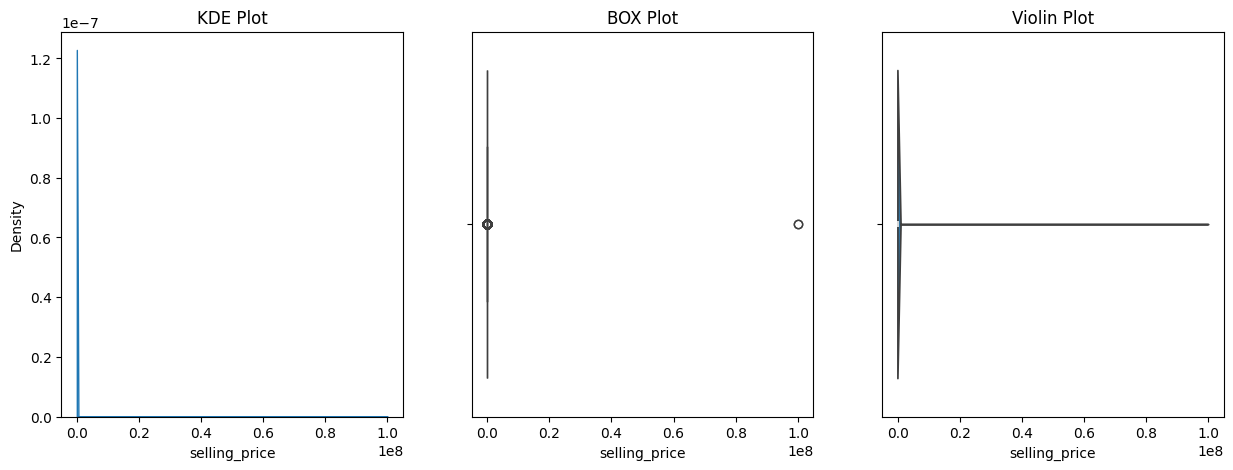

In [10]:
for i in data.select_dtypes(['int64','float64']).columns:
    plt.figure(figsize=(15,5))    
    plt.subplot(1,3,1)
    sns.kdeplot(data=data, x=data[i],shade=True)
    plt.title(f'KDE Plot')

    plt.subplot(1,3,2)
    sns.boxplot(data=data, x=data[i])
    plt.title(f'BOX Plot')      
    
    plt.subplot(1,3,3)
    sns.violinplot(data=data, x=data[i])
    plt.title(f'Violin Plot')      
    plt.show()

In [11]:
data.select_dtypes(['int64','float64']).corr()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
quantity tons,1.000000,-0.000031,-0.001530,-0.001955,-0.000640,-0.000428,-0.001086,-0.000010
customer,-0.000031,1.000000,-0.006669,-0.006869,0.009589,0.009203,-0.007716,-0.000053
country,-0.001530,-0.006669,1.000000,-0.019304,-0.019645,0.055229,-0.147326,0.002993
application,-0.001955,-0.006869,-0.019304,1.000000,-0.059531,-0.204478,-0.131784,0.001462
thickness,-0.000640,0.009589,-0.019645,-0.059531,1.000000,0.161713,0.038081,-0.001130
width,-0.000428,0.009203,0.055229,-0.204478,0.161713,1.000000,-0.034460,0.000583
product_ref,-0.001086,-0.007716,-0.147326,-0.131784,0.038081,-0.034460,1.000000,0.002118
selling_price,-0.000010,-0.000053,0.002993,0.001462,-0.001130,0.000583,0.002118,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

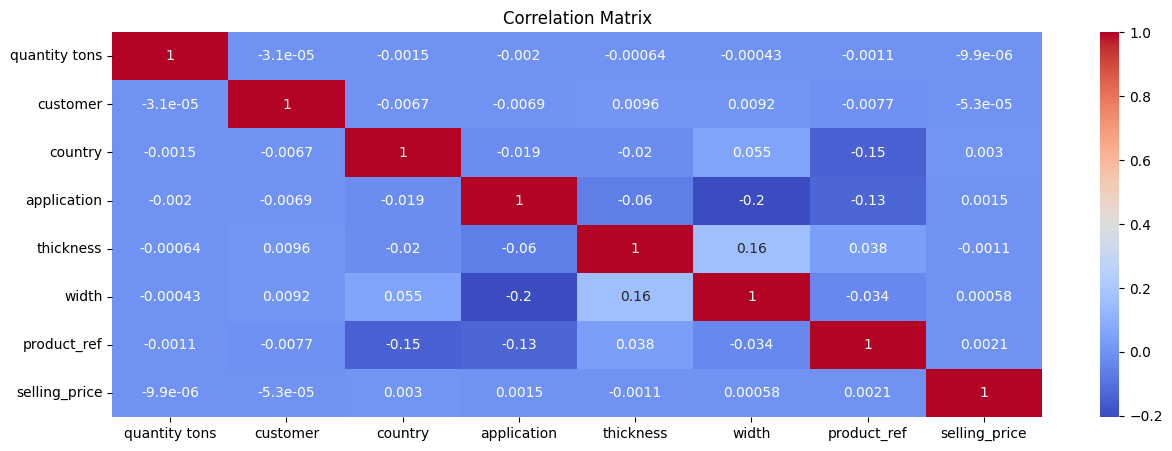

In [12]:
plt.figure(figsize=(15,5))
sns.heatmap(data.select_dtypes(['int64','float64']).corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")

In [13]:
log_col = ["quantity tons","thickness","selling_price"]
for col in log_col:
    data[col] = np.log(data[col])    

In [14]:
data.dropna(inplace=True)

In [15]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

In [16]:
x = data[["quantity tons","customer","country","application","thickness","width","product_ref"]]
y = data[['selling_price']]

In [17]:
ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(data[['status']])
status = ohe.fit_transform(data[['status']]).toarray()

In [18]:
ohe1 = OneHotEncoder(handle_unknown="ignore")
ohe1.fit(data[['item type']])
item_type = ohe1.fit_transform(data[['item type']]).toarray()

In [19]:
x = np.concatenate((x[["quantity tons","customer","country","application","thickness","width","product_ref"]].values,status,item_type),axis=1)

In [20]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [21]:
y['selling_price'] = y['selling_price'].replace(y['selling_price'].min(),y['selling_price'].median())

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=42)

In [24]:
ytrain = ytrain.fillna(y['selling_price'].median())
ytest = ytest.fillna(y['selling_price'].median())

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(xtrain,ytrain)
lrt = lr.predict(xtrain)
lrp = lr.predict(xtest)
print(f"Training score : {r2_score(ytrain,lrt)}")
print(f"Testing score : {r2_score(ytest,lrp)}")

Training score : 0.854410979112424
Testing score : 0.8652908862599543


In [26]:
dtr = DecisionTreeRegressor(criterion='friedman_mse',max_depth=21,min_samples_leaf=4,min_samples_split=10).fit(xtrain,ytrain)
dtt = dtr.predict(xtrain)
dtp = dtr.predict(xtest)
print(f"Training score : {r2_score(ytrain,dtt)}")
print(f"Testing score : {r2_score(ytest,dtp)}")

Training score : 0.9529988650067648
Testing score : 0.927141689555282


In [27]:
from sklearn.metrics import mean_squared_error as mse
mse(ytest,dtp)

0.023812521740672977

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor().fit(xtrain,ytrain)
rft = rf.predict(xtrain)
rfp = rf.predict(xtest)
print(f"Training score : {r2_score(ytrain,rft)}")
print(f"Testing score : {r2_score(ytest,rfp)}")

Training score : 0.990040593951928
Testing score : 0.9392103854899471


In [29]:
mse(ytest,rfp)

0.019868070070415793

In [30]:
from joblib import dump

In [31]:
dump(rf,"copperRegressorModel.joblib")

['copperRegressorModel.joblib']

In [32]:
dump(ohe,"statusOHE.joblib")

['statusOHE.joblib']

In [31]:
dump(ohe1,"itemtypeOHE.joblib")

['itemtypeOHE.joblib']

In [33]:
dump(scale,"stdscaler.joblib")

['stdscaler.joblib']